In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import yaml

from utils import calculate_big5, calculate_qscore, calculate_trueskill

# Load dataset

In [2]:
# file_name = "Global_n=500.xlsx" # half the dataset
file_name = "SEC_Raw data_Global_170924"  # full dataset
df_raw = pd.read_excel(f"data/labels/final/{file_name}.xlsx")
df_raw

,Respondent,Country,D1,D2,D3,D4,D5xCHL,D5xUS,D5xND,D5xNGR,...,Image_392,Image_393,Image_394,Image_395,Image_396,Image_397,Image_398,Image_399,Image_400,Equal
0,4,1,2,4,185,185,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,1,2,4,185,185,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,1,2,4,185,185,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,2,4,185,185,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,2,4,185,185,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5459,3,2,2,218,218,NaN,17.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49996,5459,3,2,2,218,218,NaN,17.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49997,5459,3,2,2,218,218,NaN,17.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
49998,5459,3,2,2,218,218,NaN,17.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# number of participants
df_raw["Respondent"].nunique()

1000

# Renaming and remapping columns and categorical values

In [4]:
# file with mapping of features and columns
with open("mapping.yaml") as f:
    mapping = yaml.safe_load(f)
mapping

{'columns': {'D1': 'gender',
  'D2': 'age_group',
  'D3': 'nationality',
  'D4': 'country_living',
  'D6': 'city_living_length',
  'D8': 'num_household',
  'D9': 'education_level',
  'D10': 'race_ethnicity'},
 'values': {'Country': {1: 'Singapore',
   2: 'Chile',
   3: 'USA',
   4: 'Netherlands',
   5: 'Nigeria'},
  'gender': {1: 'male', 2: 'female', 3: 'non-binary', 4: 'not-say'},
  'age_group': {1: 'Less than 21 years old',
   2: '21-29',
   3: '30-39',
   4: '40-49',
   5: 'Above 50'},
  'city_living_length': {1: 'Less than 1 year',
   2: '1-3 years',
   3: '3-5 years',
   4: 'Above 5 years'},
  'D7xSG': {1: 'SGD$0 - SGD$9,999',
   2: 'SGD$10,000 - SGD$24,999',
   3: 'SGD$25,000 - SGD$44,999',
   4: 'SGD$45,000 - SGD$62,999',
   5: 'SGD$63,000 - SGD$81,999',
   6: 'SGD$82,000 - SGD$99,999',
   7: 'SGD$100,000 - SGD$119,999',
   8: 'SGD$120,000 - SGD$139,999',
   9: 'SGD$140,000 - SGD$159,999',
   10: 'SGD$160,000 - SGD$179,999',
   11: 'SGD$180,000 - SGD$999,999',
   12: 'Prefer not

In [5]:
# rename columns
df_mapped = df_raw.copy()
df_mapped.rename(columns=mapping["columns"], inplace=True)
idx_map = df_mapped.columns.get_loc(
    "Question"
)  # after this column is where image comparison starts
print(df_mapped.columns[: idx_map + 1])

Index(['Respondent', 'Country', 'gender', 'age_group', 'nationality',
       'country_living', 'D5xCHL', 'D5xUS', 'D5xND', 'D5xNGR',
       'city_living_length', 'D7xSG', 'D7xND', 'D7xUS', 'D7xCHL', 'D7xNGR',
       'num_household', 'education_level', 'race_ethnicity', 'D11r1', 'D11r2',
       'D11r3', 'D11r4', 'D11r5', 'D11r6', 'D11r7', 'D11r8', 'D11r9', 'D11r10',
       'Iteration', 'Question'],
      dtype='object')


In [6]:
# remap values
for col, value_mapping in mapping["values"].items():
    if col in df_mapped.columns:
        df_mapped[col] = df_mapped[col].replace(value_mapping)

# TIPI - Big5 Personality calculation (D11)

In [7]:
df_mapped = calculate_big5(df_mapped)
df_mapped

,Respondent,Country,gender,age_group,nationality,country_living,D5xCHL,D5xUS,D5xND,D5xNGR,...,Image_392,Image_393,Image_394,Image_395,Image_396,Image_397,Image_398,Image_399,Image_400,Equal
0,4,Singapore,female,40-49,185,185,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,Singapore,female,40-49,185,185,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,Singapore,female,40-49,185,185,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Singapore,female,40-49,185,185,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Singapore,female,40-49,185,185,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5459,USA,female,21-29,218,218,NaN,17.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49996,5459,USA,female,21-29,218,218,NaN,17.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49997,5459,USA,female,21-29,218,218,NaN,17.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
49998,5459,USA,female,21-29,218,218,NaN,17.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# General descriptions

## Unique images

In [8]:
# number of unique images
images_left = df_mapped["Left_image"].unique()
images_right = df_mapped["Right_image"].unique()
total_imgs = list(set(list(images_left) + list(images_right)))
print(len(total_imgs))

400


## Countries

In [9]:
# split by country
df_mapped.groupby("Country")["Respondent"].nunique().reset_index()

,Country,Respondent
0,Chile,200
1,Netherlands,200
2,Nigeria,200
3,Singapore,200
4,USA,200


## D1: Gender

In [10]:
# split by gender
df_mapped.groupby("gender")["Respondent"].nunique().reset_index()

,gender,Respondent
0,female,502
1,male,498


In [11]:
df_mapped.groupby(["Country", "gender"])["Respondent"].nunique().reset_index()

,Country,gender,Respondent
0,Chile,female,102
1,Chile,male,98
2,Netherlands,female,100
3,Netherlands,male,100
4,Nigeria,female,98
5,Nigeria,male,102
6,Singapore,female,102
7,Singapore,male,98
8,USA,female,100
9,USA,male,100


## D2: Age group

In [12]:
# split by age_group
df_mapped.groupby("age_group")["Respondent"].nunique().reset_index()

,age_group,Respondent
0,21-29,200
1,30-39,204
2,40-49,180
3,Above 50,416


In [13]:
df_mapped.groupby(["Country", "age_group"])["Respondent"].nunique().reset_index()

,Country,age_group,Respondent
0,Chile,21-29,40
1,Chile,30-39,42
2,Chile,40-49,38
3,Chile,Above 50,80
4,Netherlands,21-29,32
5,Netherlands,30-39,34
6,Netherlands,40-49,32
7,Netherlands,Above 50,102
8,Nigeria,21-29,62
9,Nigeria,30-39,56


In [14]:
# Recategorising this age_group into a new column age_group_2:
# lower_age_group 21-29, 30-39
# higher_age_group 40-49, Above 50
new_age_col = df_mapped["age_group"].map(
    {
        "21-29": "21-39",
        "30-39": "21-39",
        "40-49": "40+",
        "Above 50": "40+",
    }
)

# insert column after city_living_length
df_mapped.insert(
    loc=df_mapped.columns.get_loc("age_group") + 1,
    column="age_group_2",
    value=new_age_col,
)
df_mapped.groupby("age_group_2")["Respondent"].nunique().reset_index()

,age_group_2,Respondent
0,21-39,404
1,40+,596


In [15]:
df_mapped.groupby(["Country", "age_group_2"])["Respondent"].nunique().reset_index()

,Country,age_group_2,Respondent
0,Chile,21-39,82
1,Chile,40+,118
2,Netherlands,21-39,66
3,Netherlands,40+,134
4,Nigeria,21-39,118
5,Nigeria,40+,82
6,Singapore,21-39,68
7,Singapore,40+,132
8,USA,21-39,70
9,USA,40+,130


## D3: Nationality and D4: Country living
A csv file in `data/labels` named `countries` contains the numerical mapping
The colunm `country_living` is redundant as it duplicates the `Country` column

In [16]:
mapping_df = pd.read_csv("data/labels/countries.csv")
# create a dictionary from the mapping file
mapping_dict = dict(zip(mapping_df["code"], mapping_df["Country"]))
df_mapped["nationality"] = df_mapped["nationality"].map(mapping_dict)
df_mapped["country_living"] = df_mapped["country_living"].map(mapping_dict)
df_mapped.groupby(["Country", "nationality"])["Respondent"].nunique().reset_index()

,Country,nationality,Respondent
0,Chile,Algeria,1
1,Chile,Antarctica,1
2,Chile,Bolivia,1
3,Chile,Chile,184
4,Chile,Colombia,1
5,Chile,Haiti,1
6,Chile,Peru,4
7,Chile,Spain,1
8,Chile,Venezuela,6
9,Netherlands,Angola,1


In [17]:
# count nationalities of the respondens living in each country
df_mapped.groupby("Country")["nationality"].nunique().reset_index()

,Country,nationality
0,Chile,9
1,Netherlands,10
2,Nigeria,1
3,Singapore,8
4,USA,17


## D5: City living

In [18]:
# map city code with name for each country
for c in df_mapped["Country"].unique():
    if c == "Singapore":
        continue  # Singapore is a city-state
    mapping_df = pd.read_csv(f"data/labels/{c}.csv")
    mapping_dict = dict(zip(mapping_df["code"], mapping_df["City"]))
    if c == "Chile":
        df_mapped["D5xCHL"] = df_mapped["D5xCHL"].map(mapping_dict)
    elif c == "US":
        df_mapped["D5xUS"] = df_mapped["D5xUS"].map(mapping_dict)
    elif c == "Netherlands":
        df_mapped["D5xND"] = df_mapped["D5xND"].map(mapping_dict)
    elif c == "Nigeria":
        df_mapped["D5xNGR"] = df_mapped["D5xNGR"].map(mapping_dict)

# merge columns into a single one
new_city_col = (
    df_mapped[["D5xCHL", "D5xUS", "D5xND", "D5xNGR"]].bfill(axis=1).iloc[:, 0]
)

# insert column after age_group
df_mapped.insert(
    loc=df_mapped.columns.get_loc("country_living") + 1,
    column="city_living",
    value=new_city_col,
)
# Singapore does not have D5 question because it's a city-state
df_mapped.loc[df_mapped["Country"] == "Singapore", "city_living"] = "Singapore"

df_mapped.groupby(["Country", "city_living"])["Respondent"].nunique().reset_index()

/var/folders/kw/9lnn_1r159n28p1krywmf8_w0000gq/T/ipykernel_84590/3367037310.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_mapped[["D5xCHL", "D5xUS", "D5xND", "D5xNGR"]].bfill(axis=1).iloc[:, 0]


,Country,city_living,Respondent
0,Chile,Santiago,200
1,Netherlands,North Holland,200
2,Nigeria,Aba,3
3,Nigeria,Abeokuta,3
4,Nigeria,Abuja,18
5,Nigeria,Ado Ekiti,1
6,Nigeria,Akure,1
7,Nigeria,Asaba,1
8,Nigeria,Awka,4
9,Nigeria,Badagry,1


In [19]:
# count cities of the respondens living in each country
df_mapped.groupby("Country")["city_living"].nunique().reset_index()

,Country,city_living
0,Chile,1
1,Netherlands,1
2,Nigeria,41
3,Singapore,1
4,USA,2


## D6: City living length

In [20]:
df_mapped.groupby("city_living_length")["Respondent"].nunique().reset_index()

,city_living_length,Respondent
0,1-3 years,57
1,3-5 years,55
2,Above 5 years,864
3,Less than 1 year,24


In [21]:
df_mapped.groupby(["Country", "city_living_length"])[
    "Respondent"
].nunique().reset_index()

,Country,city_living_length,Respondent
0,Chile,1-3 years,7
1,Chile,3-5 years,8
2,Chile,Above 5 years,182
3,Chile,Less than 1 year,3
4,Netherlands,1-3 years,5
5,Netherlands,3-5 years,13
6,Netherlands,Above 5 years,177
7,Netherlands,Less than 1 year,5
8,Nigeria,1-3 years,22
9,Nigeria,3-5 years,15


## D7: Anual Household Income (AHI)

Because there are different tiers of AHI there is one column per country's AHI.
We will combine all of them into a single column for easier comparison and remapping

In [22]:
new_ahi_col = (
    df_mapped[["D7xND", "D7xSG", "D7xUS", "D7xCHL", "D7xNGR"]].bfill(axis=1).iloc[:, 0]
)

# insert column after age_group
df_mapped.insert(
    loc=df_mapped.columns.get_loc("city_living_length") + 1,
    column="ahi",
    value=new_ahi_col,
)

# create two auxiliary columns with remapping AHI into 2 (ahi_2) and 3 (ahi_3) subgroups
df_mapped.insert(loc=df_mapped.columns.get_loc("ahi") + 1, column="ahi_2", value="")
df_mapped.insert(loc=df_mapped.columns.get_loc("ahi_2") + 1, column="ahi_3", value="")

df_mapped.groupby(["Country", "ahi"])["Respondent"].nunique().reset_index()

,Country,ahi,Respondent
0,Chile,"20,400,001 CLP-40,400,000 CLP",32
1,Chile,"40,400,001 CLP-60,400,000 CLP",18
2,Chile,"60,400,001 CLP-80,400,000 CLP",7
3,Chile,"8,151,000 CLP & below",51
4,Chile,"8,151,001 CLP-20,400,000 CLP",68
5,Chile,"80,400,001 CLP & above",12
6,Chile,Prefer not to answer,12
7,Netherlands,"100,000 euros & above",20
8,Netherlands,"17,999 euros & below",18
9,Netherlands,"18,000 euros-29,999 euros",25


### Amsterdam

In [23]:
# Recategorising ahi for this country in two groups (ahi_2) and three (ahi_3)
df_aux = df_mapped[df_mapped["Country"] == "Netherlands"]
new_ahi_2_col = df_aux["ahi"].map(
    {
        "17,999 euros & below": "47,999 euros & below",
        "18,000 euros-29,999 euros": "47,999 euros & below",
        "30,000 euros-47,999 euros": "47,999 euros & below",
        "48,000 euros-64,999 euros": "48,000 euros & above",
        "65,000 euros-81,999 euros": "48,000 euros & above",
        "82,000 euros-99,999 euros": "48,000 euros & above",
        "100,000 euros & above": "48,000 euros & above",
        "Prefer not to answer": "Prefer not to answer",
    }
)

new_ahi_3_col = df_aux["ahi"].map(
    {
        "17,999 euros & below": "29,999 euros & below",
        "18,000 euros-29,999 euros": "29,999 euros & below",
        "30,000 euros-47,999 euros": "30,000 euros-81,999 euros",
        "48,000 euros-64,999 euros": "30,000 euros-81,999 euros",
        "65,000 euros-81,999 euros": "30,000 euros-81,999 euros",
        "82,000 euros-99,999 euros": "82,000 euros & above",
        "100,000 euros & above": "82,000 euros & above",
        "Prefer not to answer": "Prefer not to answer",
    }
)

# update these values only for this country
df_mapped.loc[df_mapped["Country"] == "Netherlands", "ahi_2"] = new_ahi_2_col
df_mapped.loc[df_mapped["Country"] == "Netherlands", "ahi_3"] = new_ahi_3_col

### Singapore

In [24]:
# Recategorising ahi for this country in two groups (ahi_2) and three (ahi_3)
df_aux = df_mapped[df_mapped["Country"] == "Singapore"]
new_ahi_2_col = df_aux["ahi"].map(
    {
        "SGD$0 - SGD$9,999": "SGD$0 - SGD$9,999",
        "SGD$10,000 - SGD$24,999": "SGD$0 - SGD$99,999",
        "SGD$25,000 - SGD$44,999": "SGD$0 - SGD$99,999",
        "SGD$45,000 - SGD$62,999": "SGD$0 - SGD$99,999",
        "SGD$63,000 - SGD$81,999": "SGD$0 - SGD$99,999",
        "SGD$82,000 - SGD$99,999": "SGD$0 - SGD$99,999",
        "SGD$100,000 - SGD$119,999": "SGD$100,000 - SGD$999,999",
        "SGD$120,000 - SGD$139,999": "SGD$100,000 - SGD$999,999",
        "SGD$140,000 - SGD$159,999": "SGD$100,000 - SGD$999,999",
        "SGD$160,000 - SGD$179,999": "SGD$100,000 - SGD$999,999",
        "SGD$180,000 - SGD$999,999": "SGD$100,000 - SGD$999,999",
        "Prefer not to answer": "Prefer not to answer",
    }
)

new_ahi_3_col = df_aux["ahi"].map(
    {
        "SGD$0 - SGD$9,999": "SGD$0 - SGD$44,999",
        "SGD$10,000 - SGD$24,999": "SGD$0 - SGD$44,999",
        "SGD$25,000 - SGD$44,999": "SGD$0 - SGD$44,999",
        "SGD$45,000 - SGD$62,999": "SGD$45,000 - SGD$99,999",
        "SGD$63,000 - SGD$81,999": "SGD$45,000 - SGD$99,999",
        "SGD$82,000 - SGD$99,999": "SGD$45,000 - SGD$99,999",
        "SGD$100,000 - SGD$119,999": "SGD$100,000 - SGD$999,999",
        "SGD$120,000 - SGD$139,999": "SGD$100,000 - SGD$999,999",
        "SGD$140,000 - SGD$159,999": "SGD$100,000 - SGD$999,999",
        "SGD$160,000 - SGD$179,999": "SGD$100,000 - SGD$999,999",
        "SGD$180,000 - SGD$999,999": "SGD$100,000 - SGD$999,999",
        "Prefer not to answer": "Prefer not to answer",
    }
)

# update these values only for this country
df_mapped.loc[df_mapped["Country"] == "Singapore", "ahi_2"] = new_ahi_2_col
df_mapped.loc[df_mapped["Country"] == "Singapore", "ahi_3"] = new_ahi_3_col

### San Francisco

In [25]:
# Recategorising ahi for this country in two groups (ahi_2) and three (ahi_3)
df_aux = df_mapped[df_mapped["Country"] == "USA"]
new_ahi_2_col = df_aux["ahi"].map(
    {
        "USD$0 - USD$24,999": "USD$0 - USD$99,999",
        "USD$25,000 - USD$34,999": "USD$0 - USD$99,999",
        "USD$35,000 - USD$49,999": "USD$0 - USD$99,999",
        "USD$50,000 - USD$74,999": "USD$0 - USD$99,999",
        "USD$75,000 - USD$99,999": "USD$0 - USD$99,999",
        "USD$100,000 - USD$149,999": "USD$100,000 - USD$999,999",
        "USD$150,000 - USD$199,999": "USD$100,000 - USD$999,999",
        "USD$200,000 - USD$999,999": "USD$100,000 - USD$999,999",
        "Prefer not to answer": "Prefer not to answer",
    }
)

new_ahi_3_col = df_aux["ahi"].map(
    {
        "USD$0 - USD$24,999": "USD$0 - USD$49,999",
        "USD$25,000 - USD$34,999": "USD$0 - USD$49,999",
        "USD$35,000 - USD$49,999": "USD$0 - USD$49,999",
        "USD$50,000 - USD$74,999": "USD$50,000 - USD$99,999",
        "USD$75,000 - USD$99,999": "USD$50,000 - USD$99,999",
        "USD$100,000 - USD$149,999": "USD$100,000 - USD$999,999",
        "USD$150,000 - USD$199,999": "USD$100,000 - USD$999,999",
        "USD$200,000 - USD$999,999": "USD$100,000 - USD$999,999",
        "Prefer not to answer": "Prefer not to answer",
    }
)

# update these values only for this country
df_mapped.loc[df_mapped["Country"] == "USA", "ahi_2"] = new_ahi_2_col
df_mapped.loc[df_mapped["Country"] == "USA", "ahi_3"] = new_ahi_3_col

### Santiago

In [26]:
# Recategorising ahi for this country in two groups (ahi_2) and three (ahi_3)
df_aux = df_mapped[df_mapped["Country"] == "Chile"]
new_ahi_2_col = df_aux["ahi"].map(
    {
        "8,151,000 CLP & below": "40,400,000 CLP & below",
        "8,151,001 CLP-20,400,000 CLP": "40,400,000 CLP & below",
        "20,400,001 CLP-40,400,000 CLP": "40,400,000 CLP & below",
        "40,400,001 CLP-60,400,000 CLP": "40,400,001 CLP & above",
        "60,400,001 CLP-80,400,000 CLP": "40,400,001 CLP & above",
        "80,400,001 CLP & above": "40,400,001 CLP & above",
        "Prefer not to answer": "Prefer not to answer",
    }
)

new_ahi_3_col = df_aux["ahi"].map(
    {
        "8,151,000 CLP & below": "20,400,000 CLP & below",
        "8,151,001 CLP-20,400,000 CLP": "20,400,000 CLP & below",
        "20,400,001 CLP-40,400,000 CLP": "20,400,001 CLP-60,400,000 CLP",
        "40,400,001 CLP-60,400,000 CLP": "20,400,001 CLP-60,400,000 CLP",
        "60,400,001 CLP-80,400,000 CLP": "60,400,001 CLP & above",
        "80,400,001 CLP & above": "60,400,001 CLP & above",
        "Prefer not to answer": "Prefer not to answer",
    }
)

# update these values only for this country
df_mapped.loc[df_mapped["Country"] == "Chile", "ahi_2"] = new_ahi_2_col
df_mapped.loc[df_mapped["Country"] == "Chile", "ahi_3"] = new_ahi_3_col

### Abuja

In [27]:
# Recategorising ahi for this country in two groups (ahi_2) and three (ahi_3)
df_aux = df_mapped[df_mapped["Country"] == "Nigeria"]
new_ahi_2_col = df_aux["ahi"].map(
    {
        "2,000,000 NGN & below": "4,000,000 NGN & below",
        "2,000,001 NGN-4,000,000 NGN": "4,000,000 NGN & below",
        "4,000,001 NGN-6,799,999 NGN": "4,000,001 NGN & above",
        "6,800,000 NGN & above": "4,000,001 NGN & above",
        "Prefer not to answer": "Prefer not to answer",
    }
)

new_ahi_3_col = df_aux["ahi"].map(
    {
        "2,000,000 NGN & below": "2,000,000 NGN & below",  # not being remapped
        "2,000,001 NGN-4,000,000 NGN": "2,000,001 NGN-4,000,000 NGN",  # not being remapped
        "4,000,001 NGN-6,799,999 NGN": "4,000,001 NGN & above",
        "6,800,000 NGN & above": "4,000,001 NGN & above",
        "Prefer not to answer": "Prefer not to answer",
        # only compared loweset group and top 2 because of same sample size 60ish
    }
)

# update these values only for this country
df_mapped.loc[df_mapped["Country"] == "Nigeria", "ahi_2"] = new_ahi_2_col
df_mapped.loc[df_mapped["Country"] == "Nigeria", "ahi_3"] = new_ahi_3_col

In [28]:
df_mapped.groupby(["Country", "ahi_2"])["Respondent"].nunique().reset_index()

,Country,ahi_2,Respondent
0,Chile,"40,400,000 CLP & below",151
1,Chile,"40,400,001 CLP & above",37
2,Chile,Prefer not to answer,12
3,Netherlands,"47,999 euros & below",88
4,Netherlands,"48,000 euros & above",95
5,Netherlands,Prefer not to answer,17
6,Nigeria,"4,000,000 NGN & below",134
7,Nigeria,"4,000,001 NGN & above",60
8,Nigeria,Prefer not to answer,6
9,Singapore,Prefer not to answer,1


In [29]:
df_mapped.groupby(["Country", "ahi_3"])["Respondent"].nunique().reset_index()

,Country,ahi_3,Respondent
0,Chile,"20,400,000 CLP & below",119
1,Chile,"20,400,001 CLP-60,400,000 CLP",50
2,Chile,"60,400,001 CLP & above",19
3,Chile,Prefer not to answer,12
4,Netherlands,"29,999 euros & below",43
5,Netherlands,"30,000 euros-81,999 euros",101
6,Netherlands,"82,000 euros & above",39
7,Netherlands,Prefer not to answer,17
8,Nigeria,"2,000,000 NGN & below",66
9,Nigeria,"2,000,001 NGN-4,000,000 NGN",68


### Remapping AHI

In [30]:
df_mapped["ahi_3_remapped"] = df_mapped["ahi_3"].map(
    {
       "20,400,000 CLP & below": "bottom",
        "20,400,001 CLP-60,400,000 CLP": "middle",
        "60,400,001 CLP & above": "upper",
        
        "29,999 euros & below": "bottom",
        "30,000 euros-81,999 euros": "middle",
        "82,000 euros & above": "upper",
        
        "2,000,000 NGN & below": "bottom",
        "2,000,001 NGN-4,000,000 NGN": "middle",
        "4,000,001 NGN & above": "upper",
        
        "SGD$0 - SGD$44,999": "bottom",
        "SGD$45,000 - SGD$99,999": "middle",
        "SGD$100,000 - SGD$999,999": "upper",
        
        "USD$0 - USD$49,999": "bottom",
        "USD$50,000 - USD$99,999": "middle",
        "USD$100,000 - USD$999,999": "upper",
        
        "Prefer not to answer": "Prefer not to answer",
    }
)
df_mapped.groupby("ahi_3_remapped")["Respondent"].nunique().reset_index()

,ahi_3_remapped,Respondent
0,Prefer not to answer,39
1,bottom,339
2,middle,327
3,upper,295


In [31]:
df_mapped.groupby(["Country", "ahi_3_remapped"])["Respondent"].nunique().reset_index()

,Country,ahi_3_remapped,Respondent
0,Chile,Prefer not to answer,12
1,Chile,bottom,119
2,Chile,middle,50
3,Chile,upper,19
4,Netherlands,Prefer not to answer,17
5,Netherlands,bottom,43
6,Netherlands,middle,101
7,Netherlands,upper,39
8,Nigeria,Prefer not to answer,6
9,Nigeria,bottom,66


## D8: Number of household members

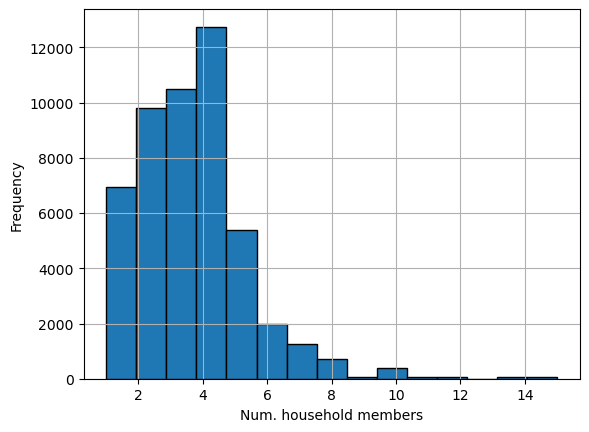

In [32]:
# plot histogram
df_mapped["num_household"].hist(bins=max(df_mapped["num_household"]), edgecolor="black")

# Customize plot
plt.xlabel("Num. household members")
plt.ylabel("Frequency")

# Show plot
plt.show()

In [33]:
print(f'min:\n {df_mapped["num_household"].min()}')
print(f'mean:\n {df_mapped["num_household"].mean()}')
print(f'max:\n {df_mapped["num_household"].max()}')
df_mapped.groupby("num_household")["Respondent"].nunique().reset_index()

min:
 1
mean:
 3.389
max:
 15


,num_household,Respondent
0,1,139
1,2,196
2,3,210
3,4,255
4,5,108
5,6,40
6,7,25
7,8,14
8,9,1
9,10,8


## D9: Education level

In [34]:
# split by education_level
df_mapped.groupby("education_level")["Respondent"].nunique().reset_index()

,education_level,Respondent
0,Bachelors degree,380
1,College or Vocational training or Diploma,229
2,Doctorate or professional degree,38
3,Less than Secondary/High school,11
4,Masters degree,122
5,Other,11
6,Secondary/High school graduate or equivalent,209


In [35]:
df_mapped.groupby(["Country", "education_level"])["Respondent"].nunique().reset_index()

,Country,education_level,Respondent
0,Chile,Bachelors degree,42
1,Chile,College or Vocational training or Diploma,71
2,Chile,Doctorate or professional degree,9
3,Chile,Less than Secondary/High school,3
4,Chile,Masters degree,4
5,Chile,Other,7
6,Chile,Secondary/High school graduate or equivalent,64
7,Netherlands,Bachelors degree,52
8,Netherlands,College or Vocational training or Diploma,43
9,Netherlands,Doctorate or professional degree,9


In [36]:
# Recategorising this demographic into:
# primary_secondary_vocational: Less than Secondary/High school, Secondary/High school graduate or equivalent, College or Vocational training or Diploma
# undergraduate: Bachelors degree
# postgraduate: Masters degree, Doctorate or professional degree
# other: Other

# Remapping values
df_mapped["education_level_remapped"] = df_mapped["education_level"].map(
    {
        "Less than Secondary/High school": "primary_secondary",
        "Secondary/High school graduate or equivalent": "primary_secondary",
        "College or Vocational training or Diploma": "college_vocational_diploma",
        "Bachelors degree": "undergraduate",
        "Masters degree": "postgraduate",
        "Doctorate or professional degree": "postgraduate",
        "Other": "other",
    }
)
df_mapped.groupby("education_level_remapped")["Respondent"].nunique().reset_index()

,education_level_remapped,Respondent
0,college_vocational_diploma,229
1,other,11
2,postgraduate,160
3,primary_secondary,220
4,undergraduate,380


In [37]:
df_mapped.groupby(["Country", "education_level_remapped"])["Respondent"].nunique().reset_index()

,Country,education_level_remapped,Respondent
0,Chile,college_vocational_diploma,71
1,Chile,other,7
2,Chile,postgraduate,13
3,Chile,primary_secondary,67
4,Chile,undergraduate,42
5,Netherlands,college_vocational_diploma,43
6,Netherlands,other,1
7,Netherlands,postgraduate,33
8,Netherlands,primary_secondary,71
9,Netherlands,undergraduate,52


## D10: Race and Ethnicity

In [38]:
# split by race_ethnicity
df_mapped.groupby("race_ethnicity")["Respondent"].nunique().reset_index()

,race_ethnicity,Respondent
0,A race/ethnicity not listed here,69
1,Asian or Pacific Islander,231
2,Black or African American,184
3,Hispanic or Latino,166
4,Middle Eastern or North African,32
5,Native American or Alaska Native,5
6,White or Caucasian,313


In [39]:
# split by race_ethnicity by country
df_mapped.groupby(["Country", "race_ethnicity"])["Respondent"].nunique().reset_index()

,Country,race_ethnicity,Respondent
0,Chile,A race/ethnicity not listed here,6
1,Chile,Black or African American,1
2,Chile,Hispanic or Latino,145
3,Chile,Middle Eastern or North African,1
4,Chile,Native American or Alaska Native,1
5,Chile,White or Caucasian,46
6,Netherlands,A race/ethnicity not listed here,24
7,Netherlands,Asian or Pacific Islander,4
8,Netherlands,Black or African American,5
9,Netherlands,Hispanic or Latino,4


# Remapping pair-wise choices (columns 32 onwards)

In the file `data/labels/Global_n=500.xlsx`, there is a sheet named `Datamap`.

Here it is shown that columns between `Right_image` and `Equal` list all available images.
The values of these cells correspond to the image selected on that instance.

Example:

| Left_image | Right_image | ... | Image_3 | ... | Image_324 | Equal |
| --- | --- | --- | --- | --- | --- | --- |
|Image_3|Image_324| ... | 0 | ... | 1 | 0 |

This means than in a comparison of `Image_3` and `Image_324`, `Image_3` was chosen.

In the case that both images are perceived as Equal, the datapoint would look like this:

| Left_image | Right_image | ... | Image_3 | ... | Image_324 | Equal |
| --- | --- | --- | --- | --- | --- | --- |
|Image_3|Image_324| ... | 1 | ... | 1 | 1 |

The following code will condense this to one column as `Score`, whether the choice was `left`, `right`, or `equal`

In [40]:
choice = []

# indices of the columns to iterate through
idx_begin = df_mapped.columns.get_loc("Image_1")
idx_end = df_mapped.columns.get_loc("Image_400")

# iterate through rows
for _, row in df_mapped.iterrows():
    # check the first condition of "equal" choice since there is a column specifically for this
    if row["Equal"] == 1:
        choice.append("equal")
        continue

    # otherwise, iterate through all image selection encoding columns
    for col_idx in range(idx_begin, idx_end + 1):  # [a, b+1)
        col_name = int(
            row.index[col_idx].split("_")[1]
        )  # e.g., "Image_1", we need only the number "1"
        # any column with a value of 1 means the image of that column name was chosen.
        if row.iloc[col_idx] == 1:
            # the value of the respondent's choice: left, right, or equal
            if col_name == row["Left_image"]:
                choice.append("left")
            elif col_name == row["Right_image"]:
                choice.append("right")
assert df_mapped.shape[0] == len(
    choice
), "The number of encoded responses should match the number of answers!"

# update dataset with this new column
df_mapped["Score"] = choice
df_mapped

,Respondent,Country,gender,age_group,age_group_2,nationality,country_living,city_living,D5xCHL,D5xUS,...,Image_395,Image_396,Image_397,Image_398,Image_399,Image_400,Equal,ahi_3_remapped,education_level_remapped,Score
0,4,Singapore,female,40-49,40+,Singapore,Singapore,Singapore,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,middle,college_vocational_diploma,left
1,4,Singapore,female,40-49,40+,Singapore,Singapore,Singapore,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,middle,college_vocational_diploma,left
2,4,Singapore,female,40-49,40+,Singapore,Singapore,Singapore,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,middle,college_vocational_diploma,left
3,4,Singapore,female,40-49,40+,Singapore,Singapore,Singapore,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,middle,college_vocational_diploma,left
4,4,Singapore,female,40-49,40+,Singapore,Singapore,Singapore,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,middle,college_vocational_diploma,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5459,USA,female,21-29,21-39,United States,United States,17.0,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bottom,college_vocational_diploma,right
49996,5459,USA,female,21-29,21-39,United States,United States,17.0,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bottom,college_vocational_diploma,left
49997,5459,USA,female,21-29,21-39,United States,United States,17.0,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,bottom,college_vocational_diploma,equal
49998,5459,USA,female,21-29,21-39,United States,United States,17.0,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bottom,college_vocational_diploma,left


In the final dataset, the vendor already included a column named `Choice` that has the image chosen, e.g., `Image_3` as a value in one row.

We will now map that into `left` or `right`

In [41]:
choice = []

# iterate through rows
for _, row in df_mapped.iterrows():
    # check the first condition of "equal" choice since there is a column specifically for this
    if row["Choice"] == "Equal":
        choice.append("equal")
    elif row["Choice"].split("_")[1] == str(row["Left_image"]):
        choice.append("left")
    elif row["Choice"].split("_")[1] == str(row["Right_image"]):
        choice.append("right")
assert df_mapped.shape[0] == len(
    choice
), "The number of encoded responses should match the number of answers!"

In [42]:
# make sure calculations match
are_identical = df_mapped["Score"] == choice
# Check if all values are True (i.e., columns are fully identical)
if are_identical.all():
    print("The columns are identical.")
else:
    print("The columns are not identical.")

The columns are identical.


# Clean the final dataframe by removing extra columns

In [43]:
df_mapped_cleaned = df_mapped.drop(
    [
        "Iteration",  # remove the Iteration column
        "country_living",  # remove country_living as it is redundant with `Country`
        "D5xCHL",
        "D5xUS",
        "D5xND",
        "D5xNGR",  # remove the raw city living questions
        "D7xSG",
        "D7xND",
        "D7xUS",
        "D7xCHL",
        "D7xNGR",  # remove the raw ahi questions
        "Choice",  # remove this column as the actual choice was cleaned and moved to Score
    ],
    axis=1,
)

# remove columns from Big 5 raw questions
idx_drop_start = df_mapped_cleaned.columns.get_loc("D11r1")
idx_drop_end = df_mapped_cleaned.columns.get_loc("D11r10")
df_mapped_cleaned = df_mapped_cleaned.iloc[:, :idx_drop_start].join(
    df_mapped_cleaned.iloc[:, idx_drop_end + 1 :]
)

# remove columns from individual images
idx_drop_start = df_mapped_cleaned.columns.get_loc("Image_1")
idx_drop_end = df_mapped_cleaned.columns.get_loc("Equal")
df_mapped_cleaned = df_mapped_cleaned.iloc[:, :idx_drop_start].join(
    df_mapped_cleaned.iloc[:, idx_drop_end + 1 :]
)

print(df_mapped_cleaned.columns)
df_mapped_cleaned

Index(['Respondent', 'Country', 'gender', 'age_group', 'age_group_2',
       'nationality', 'city_living', 'city_living_length', 'ahi', 'ahi_2',
       'ahi_3', 'num_household', 'education_level', 'race_ethnicity',
       'extraversion', 'agreeableness', 'conscientiousness', 'neuroticism',
       'openness', 'extraversion_median', 'extraversion_q3_q1',
       'agreeableness_median', 'agreeableness_q3_q1',
       'conscientiousness_median', 'conscientiousness_q3_q1',
       'neuroticism_median', 'neuroticism_q3_q1', 'openness_median',
       'openness_q3_q1', 'Question', 'Left_image', 'Right_image',
       'ahi_3_remapped', 'education_level_remapped', 'Score'],
      dtype='object')


,Respondent,Country,gender,age_group,age_group_2,nationality,city_living,city_living_length,ahi,ahi_2,...,neuroticism_median,neuroticism_q3_q1,openness_median,openness_q3_q1,Question,Left_image,Right_image,ahi_3_remapped,education_level_remapped,Score
0,4,Singapore,female,40-49,40+,Singapore,Singapore,Above 5 years,"SGD$82,000 - SGD$99,999","SGD$0 - SGD$99,999",...,1,1.0,0,0.0,safe,203,44,middle,college_vocational_diploma,left
1,4,Singapore,female,40-49,40+,Singapore,Singapore,Above 5 years,"SGD$82,000 - SGD$99,999","SGD$0 - SGD$99,999",...,1,1.0,0,0.0,safe,305,382,middle,college_vocational_diploma,left
2,4,Singapore,female,40-49,40+,Singapore,Singapore,Above 5 years,"SGD$82,000 - SGD$99,999","SGD$0 - SGD$99,999",...,1,1.0,0,0.0,safe,276,69,middle,college_vocational_diploma,left
3,4,Singapore,female,40-49,40+,Singapore,Singapore,Above 5 years,"SGD$82,000 - SGD$99,999","SGD$0 - SGD$99,999",...,1,1.0,0,0.0,safe,45,278,middle,college_vocational_diploma,left
4,4,Singapore,female,40-49,40+,Singapore,Singapore,Above 5 years,"SGD$82,000 - SGD$99,999","SGD$0 - SGD$99,999",...,1,1.0,0,0.0,safe,380,305,middle,college_vocational_diploma,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5459,USA,female,21-29,21-39,United States,17.0,Above 5 years,"USD$0 - USD$24,999","USD$0 - USD$99,999",...,1,1.0,0,0.0,green,120,82,bottom,college_vocational_diploma,right
49996,5459,USA,female,21-29,21-39,United States,17.0,Above 5 years,"USD$0 - USD$24,999","USD$0 - USD$99,999",...,1,1.0,0,0.0,green,159,222,bottom,college_vocational_diploma,left
49997,5459,USA,female,21-29,21-39,United States,17.0,Above 5 years,"USD$0 - USD$24,999","USD$0 - USD$99,999",...,1,1.0,0,0.0,green,211,295,bottom,college_vocational_diploma,equal
49998,5459,USA,female,21-29,21-39,United States,17.0,Above 5 years,"USD$0 - USD$24,999","USD$0 - USD$99,999",...,1,1.0,0,0.0,green,115,369,bottom,college_vocational_diploma,left


# Save a file with image `uuid`s and location

In [44]:
metadata_df = pd.read_csv("data/svi/metadata.csv", index_col=0)
# build the file path string
data_folder = "data/svi/"
metadata_df["path"] = (
    data_folder + metadata_df["city"] + "/" + metadata_df["uuid"] + ".jpeg"
)
metadata_df[["uuid", "path"]].to_csv(f"{data_folder}/img_paths.csv")

# Save modified dataframe

In [45]:
df_mapped_cleaned.to_csv("data/labels/processed/global_mapped_cleaned_with_ahiremapped.csv")
df_mapped_cleaned = df_mapped_cleaned.drop("ahi_3_remapped", axis=1)
df_mapped_cleaned.to_csv("data/labels/processed/global_mapped_cleaned.csv")


# Save q-scores

In [46]:
df_mapped_cleaned_qscores = calculate_qscore(df_mapped_cleaned)
df_mapped_cleaned_qscores.to_csv(
    "data/labels/processed/global_mapped_cleaned_qscores.csv"
)

# Pairwise comparison counts

min comparisons per question:       Question  Num_comparisons
0    beautiful               12
1       boring               10
2        cycle               10
3   depressing               11
4        green               10
5  live nearby               12
6       lively               13
7         safe               11
8         walk               13
9      wealthy               12
avg comparisons per question:       Question  Num_comparisons
0    beautiful             25.0
1       boring             25.0
2        cycle             25.0
3   depressing             25.0
4        green             25.0
5  live nearby             25.0
6       lively             25.0
7         safe             25.0
8         walk             25.0
9      wealthy             25.0
max comparisons per question:       Question  Num_comparisons
0    beautiful               40
1       boring               39
2        cycle               46
3   depressing               41
4        green               39
5  live nearby

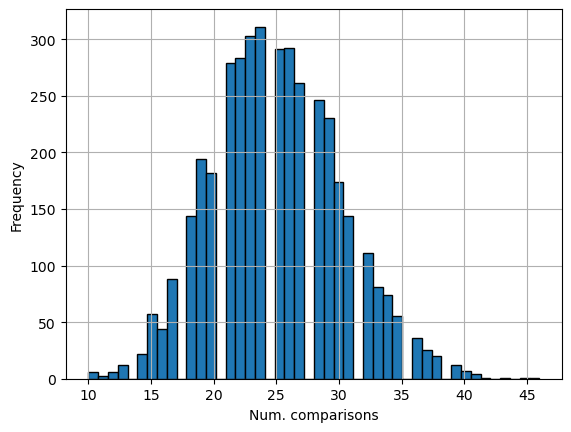

In [47]:
print(
    f'min comparisons per question: {df_mapped_cleaned_qscores.groupby("Question")["Num_comparisons"].min().reset_index()}'
)
print(
    f'avg comparisons per question: {df_mapped_cleaned_qscores.groupby("Question")["Num_comparisons"].mean().reset_index()}'
)
print(
    f'max comparisons per question: {df_mapped_cleaned_qscores.groupby("Question")["Num_comparisons"].max().reset_index()}'
)
print("Overall:")
print(f'min: {df_mapped_cleaned_qscores["Num_comparisons"].min()}')
print(f'avg: {df_mapped_cleaned_qscores["Num_comparisons"].mean()}')
print(f'max: {df_mapped_cleaned_qscores["Num_comparisons"].max()}')

# plot histogram
df_mapped_cleaned_qscores["Num_comparisons"].hist(
    bins=max(df_mapped_cleaned_qscores["Num_comparisons"]), edgecolor="black"
)

# Customize plot
plt.xlabel("Num. comparisons")
plt.ylabel("Frequency")

# Show plot
plt.show()